<a href="https://colab.research.google.com/github/geranitin/airlines/blob/main/Sydney_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load necessary modules

import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print("Setup Complete")

Setup Complete


In [3]:
#load data using github repo
url = (r'https://raw.githubusercontent.com/geranitin/airlines/main/sydney_airlines.csv')
air= pd.read_csv(url)


In [4]:
air.head()

,Departing_Port,Arriving_Port,Airline,Year,Month,Cancellations,Departures_On_Time,Departures_Delayed,Bad Weather,Sick leave
0,Adelaide,Brisbane,Anta,2020,Jan,3,98,9,3,11
1,Adelaide,Brisbane,Anta,2020,Feb,6,90,10,3,12
2,Adelaide,Brisbane,Anta,2020,Mar,9,88,8,4,12
3,Adelaide,Brisbane,Anta,2020,Apr,3,5,3,2,11
4,Adelaide,Brisbane,Anta,2020,May,4,8,3,3,11


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Departing_Port      480 non-null    object
 1   Arriving_Port       480 non-null    object
 2   Airline             480 non-null    object
 3   Year                480 non-null    int64 
 4   Month               480 non-null    object
 5   Cancellations       480 non-null    int64 
 6   Departures_On_Time  480 non-null    int64 
 7   Departures_Delayed  480 non-null    int64 
 8   Bad Weather         480 non-null    int64 
 9   Sick leave          480 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 37.6+ KB


In [6]:
air.describe()

,Year,Cancellations,Departures_On_Time,Departures_Delayed,Bad Weather,Sick leave
count,480.0,480.000000,480.000000,480.000000,480.000000,480.00000
mean,2020.0,15.722917,75.879167,17.677083,3.545833,16.42500
std,0.0,30.095538,115.066351,30.397263,2.564814,11.39528
min,2020.0,1.000000,0.000000,0.000000,0.000000,10.00000
25%,2020.0,3.750000,15.000000,3.000000,2.000000,11.00000
50%,2020.0,7.000000,32.000000,6.000000,3.000000,13.00000
75%,2020.0,16.000000,82.500000,16.000000,5.000000,16.00000
max,2020.0,246.000000,777.000000,238.000000,16.000000,98.00000


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cancellations', ylabel='count'>

Text(0.5, 1.0, 'Flight Cancellations in Australia')

Text(0.5, 0, 'Number of Cancellations')

Text(0, 0.5, 'Count')

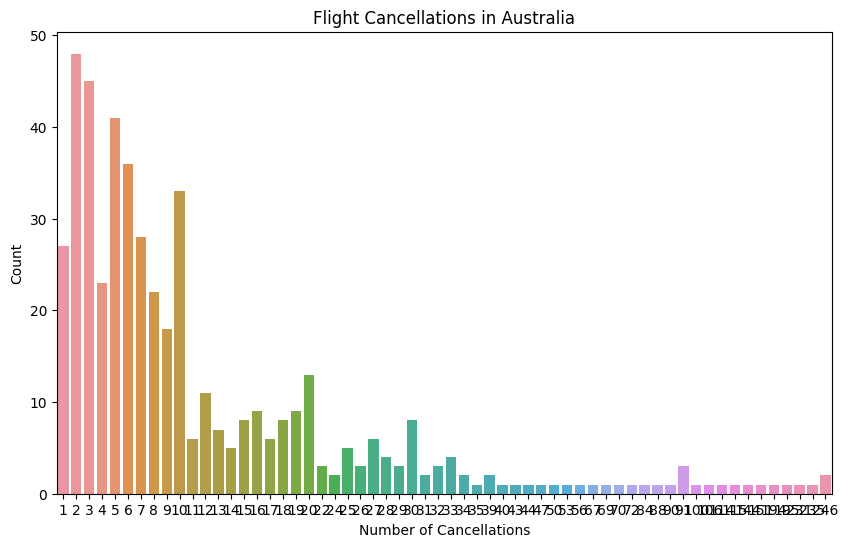

In [7]:
#Create a bar plot to visualize the distribution of flight cancellations:
plt.figure(figsize=(10, 6))
sns.countplot(data=air, x='Cancellations')
plt.title('Flight Cancellations in Australia')
plt.xlabel('Number of Cancellations')
plt.ylabel('Count')
plt.show()

In [8]:
#Calculate and display descriptive statistics of the flight cancellations variable:
print("Descriptive Statistics - Flight Cancellations:")
print("Mean:", air['Cancellations'].mean())
print("Median:", air['Cancellations'].median())
print("Standard Deviation:", air['Cancellations'].std())
print("Minimum:", air['Cancellations'].min())
print("Maximum:", air['Cancellations'].max())

Descriptive Statistics - Flight Cancellations:
Mean: 15.722916666666666
Median: 7.0
Standard Deviation: 30.0955384758556
Minimum: 1
Maximum: 246


array([[<Axes: title={'center': 'Cancellations'}>]], dtype=object)

Text(0.5, 0, 'Cancellations')

Text(0.5, 0, 'Frequency')

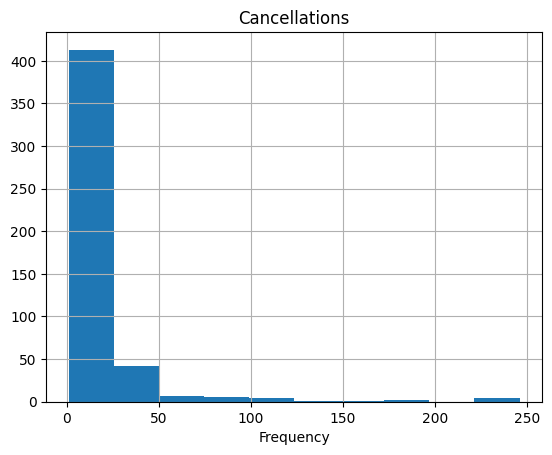

In [11]:
air[['Cancellations']].hist(bins=10)
plt.xlabel('Cancellations')
plt.xlabel('Frequency')
plt.show()

Flight Cancellations by Airlines:
  Airline  Cancellations
0    Anta           3802
1   Viria           3745

Flight Cancellations by Arriving Ports:
  Arriving_Port  Cancellations
0      Adelaide            756
1      Brisbane           1390
2     Melbourne           2216
3         Perth            828
4        Sydney           2357

Flight Cancellations by Departing Ports:
  Departing_Port  Cancellations
0       Adelaide            771
1       Brisbane           1424
2      Melbourne           2204
3          Perth            785
4         Perth              31
5         Sydney           2332


<Figure size 600x600 with 0 Axes>

<Axes: xlabel='Airline', ylabel='Cancellations'>

Text(0.5, 1.0, 'Flight Cancellations by Airlines')

Text(0.5, 0, 'Airline')

Text(0, 0.5, 'Number of Cancellations')

(array([0, 1]), [Text(0, 0, 'Anta'), Text(1, 0, 'Viria')])

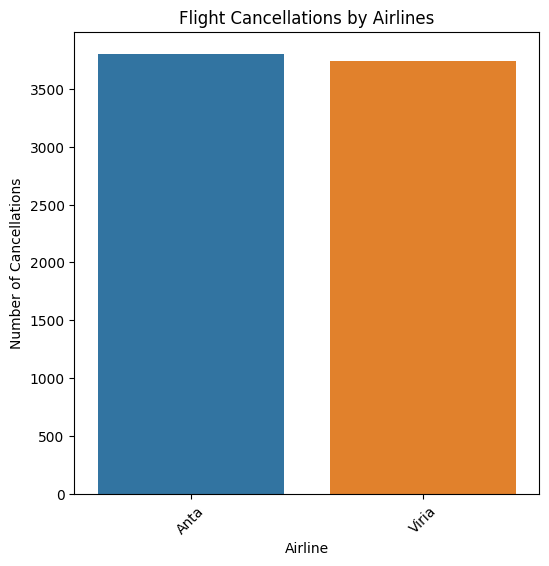

<Figure size 600x600 with 0 Axes>

<Axes: xlabel='Arriving_Port', ylabel='Cancellations'>

Text(0.5, 1.0, 'Flight Cancellations by Arriving Ports')

Text(0.5, 0, 'Arriving Port')

Text(0, 0.5, 'Number of Cancellations')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Adelaide'),
  Text(1, 0, 'Brisbane'),
  Text(2, 0, 'Melbourne'),
  Text(3, 0, 'Perth'),
  Text(4, 0, 'Sydney')])

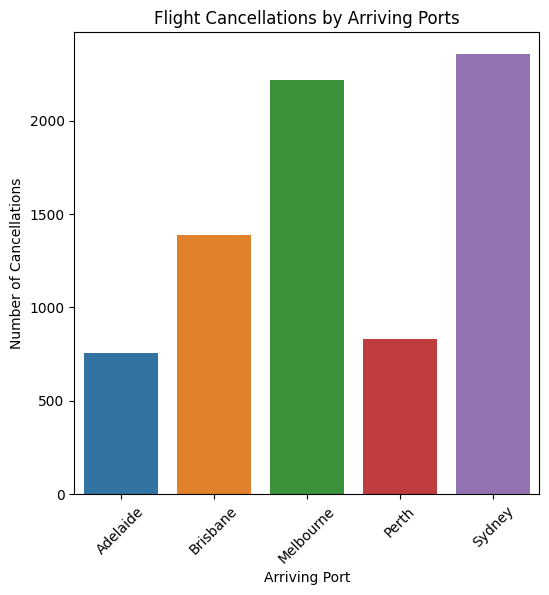

<Figure size 600x600 with 0 Axes>

<Axes: xlabel='Departing_Port', ylabel='Cancellations'>

Text(0.5, 1.0, 'Flight Cancellations by Departing Ports')

Text(0.5, 0, 'Departing Port')

Text(0, 0.5, 'Number of Cancellations')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Adelaide'),
  Text(1, 0, 'Brisbane'),
  Text(2, 0, 'Melbourne'),
  Text(3, 0, 'Perth'),
  Text(4, 0, 'Perth '),
  Text(5, 0, 'Sydney')])

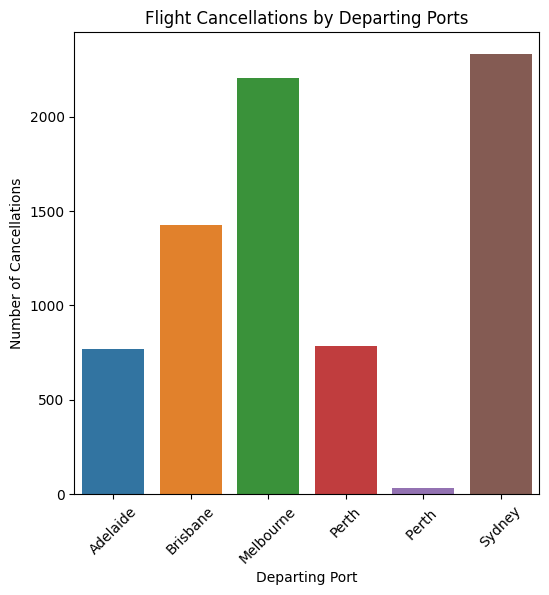

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Summary by Airlines
airlines_summary = air.groupby('Airline')['Cancellations'].sum().reset_index()
print("Flight Cancellations by Airlines:")
print(airlines_summary)

# Summary by Arriving Ports
arriving_ports_summary = air.groupby('Arriving_Port')['Cancellations'].sum().reset_index()
print("\nFlight Cancellations by Arriving Ports:")
print(arriving_ports_summary)

# Summary by Departing Ports
departing_ports_summary = air.groupby('Departing_Port')['Cancellations'].sum().reset_index()
print("\nFlight Cancellations by Departing Ports:")
print(departing_ports_summary)


# Visualization - Flight Cancellations by Airlines
plt.figure(figsize=(6, 6))
sns.barplot(data=airlines_summary, x='Airline', y='Cancellations')
plt.title('Flight Cancellations by Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

# Visualization - Flight Cancellations by Arriving Ports
plt.figure(figsize=(6, 6))
sns.barplot(data=arriving_ports_summary, x='Arriving_Port', y='Cancellations')
plt.title('Flight Cancellations by Arriving Ports')
plt.xlabel('Arriving Port')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

# Visualization - Flight Cancellations by Departing Ports
plt.figure(figsize=(6, 6))
sns.barplot(data=departing_ports_summary, x='Departing_Port', y='Cancellations')
plt.title('Flight Cancellations by Departing Ports')
plt.xlabel('Departing Port')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()




In [25]:
#Your client, the Australian Airlines Association, is interested in the following questions:
#• Whether “Cancellations” tends to be associated with the “Airline”
#• Whether “Cancellations” tends to be associated with the “Sick Leave”
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency



# Association between Cancellations and Airline
cancellations_by_airline = air.groupby('Airline')['Cancellations'].sum().reset_index()
print("Flight Cancellations by Airlines:")
print(cancellations_by_airline)

# Chi-square test for association between Cancellations and Airline
contingency_table = pd.crosstab(air['Airline'], air['Cancellations'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Test - Cancellations vs Airline:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

# Association between Cancellations and Sick Leave
cancellations_by_sick_leave = air.groupby('Sick leave')['Cancellations'].sum().reset_index()
print("\nFlight Cancellations by Sick leave:")
print(cancellations_by_sick_leave)

# Chi-square test for association between Cancellations and Sick Leave
contingency_table = pd.crosstab(air['Sick leave'], air['Cancellations'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Test - Cancellations vs Sick leave:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")


Flight Cancellations by Airlines:
  Airline  Cancellations
0    Anta           3802
1   Viria           3745

Chi-square Test - Cancellations vs Airline:
Chi-square value: 56.64600168301123
P-value: 0.5627823897737273

Flight Cancellations by Sick leave:
    Sick leave  Cancellations
0           10             78
1           11            214
2           12            468
3           13            444
4           14            388
5           15            375
6           16            275
7           17            200
8           18            311
9           19            219
10          20            368
11          21             27
12          22            321
13          23             85
14          24             52
15          25            157
16          26             98
17          27             32
18          28            105
19          29            112
20          30             79
21          31             43
22          32             47
23          35           

**Interpretation:**
The results of the chi-square test for flight cancellations by airlines and sick leave are as follows:

Flight Cancellations by Airlines:
The chi-square value is 56.64 and the p-value is 0.56. This indicates that there is no significant association between flight cancellations and airlines. In other words, the proportion of flight cancellations does not differ significantly between the two airlines (Anta and Viria).

Flight Cancellations by Sick leave:
The chi-square value is 14497.47 and the p-value is 0.0. This suggests a significant association between flight cancellations and sick leave. The p-value of 0.0 indicates that the association is highly significant. It implies that the proportion of flight cancellations differs significantly across different levels of sick leave.

In conclusion, the chi-square test indicates that there is no significant association between flight cancellations and airlines, but there is a significant association between flight cancellations and sick leave.Here sick leave means that The number of of staffs serving that particular route who called in sick in that month.